In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

import mglearn
from dashboard_one import *

In [2]:
df = pd.read_csv('main_file.csv').iloc[:,1:]
com_col = ['Phase','RID','VISCODE']
df

C:\Users\weipi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,...,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,DX_bl
0,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,NaN,...,0.0,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,CN
1,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,7.0,7.0,9.0,10.0,11.0,CN
2,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,5.0,9.0,9.0,9.0,8.0,CN
3,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,0.0,2.0,1.0,15.0,6.0,6.0,6.0,8.0,8.0,CN
4,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27115,7102,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,341_S_7102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27116,7103,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,013_S_7103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27117,7104,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,153_S_7104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27118,7105,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,035_S_7105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['PTAU'].dropna()

27       22.83
29       24.18
33       13.29
35        13.3
40       33.43
         ...  
23350    53.65
23363    36.39
23365    40.95
23391     8.53
23397     20.9
Name: PTAU, Length: 2369, dtype: object

In [4]:
npi=pd.read_csv('npi_short.csv').iloc[:,1:]
npi

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,NaN
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,NaN
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,NaN
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,ADNI3,6449,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2661,ADNI3,6516,y3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2662,ADNI3,6654,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2663,ADNI3,6820,y2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [5]:
npi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Phase    2665 non-null   object 
 1   RID      2665 non-null   int64  
 2   VISCODE  2665 non-null   object 
 3   NPIK1    1326 non-null   float64
 4   NPIK2    1325 non-null   float64
 5   NPIK3    1323 non-null   float64
 6   NPIK4    1322 non-null   float64
 7   NPIK5    1323 non-null   float64
 8   NPIK6    1325 non-null   float64
 9   NPIK7    1325 non-null   float64
 10  NPIK8    1318 non-null   float64
 11  NPIK9A   1326 non-null   float64
 12  NPIK9B   1327 non-null   float64
 13  NPIK9C   1326 non-null   float64
 14  NPIKTOT  1325 non-null   float64
 15  NPIKSEV  1276 non-null   float64
dtypes: float64(13), int64(1), object(2)
memory usage: 333.2+ KB


In [6]:
npi.describe()

,RID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV
count,2665.000000,1326.000000,1325.000000,1323.000000,1322.000000,1323.000000,1325.000000,1325.000000,1318.000000,1326.000000,1327.000000,1326.000000,1325.000000,1276.000000
mean,2798.812008,0.441176,0.541132,0.057445,0.223903,0.046107,0.218113,0.290566,0.125948,2.665913,1.360211,1.150830,3.822642,1.438871
std,2137.923372,0.496715,0.498493,0.232779,0.417016,0.209797,0.413121,0.454195,0.331917,1.026810,0.585019,1.206221,2.622140,0.616271
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,802.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000
50%,2201.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000
75%,4638.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,4.000000,2.000000
max,7100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,12.000000,3.000000


In [7]:
sleep = npi.merge(df[com_col + ['OSA','insomnia']],how='outer',on=com_col).dropna(axis=1, how='all')
sleep

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,OSA,insomnia
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,NaN,0.0,1.0
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,NaN,0.0,1.0
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,0.0,1.0
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,NaN,0.0,1.0
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27115,ADNI3,7102,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27116,ADNI3,7103,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27117,ADNI3,7104,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27118,ADNI3,7105,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [8]:
abeta_insom = df[com_col + ['ABETA']].dropna(subset=['ABETA'])  # drop rows where abeta not available
tau_insom = df[com_col + ['TAU']].dropna(subset=['TAU'])
ptau_insom = df[com_col + ['PTAU']].dropna(subset=['PTAU'])

left merge 'sleep' table to biomarker table. As it doesn't not make sense to use the datapoint where biomarker not available.

In [9]:
abeta_insom_npi = abeta_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all') # drop the columns where all are na
tau_insom_npi = tau_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all')
ptau_insom_npi = ptau_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all')

all NPIK questions and total score are not available for biomarkers. In the sleep data, only the 'insomnia','npiksev','OSA' are available for abeta,tau,ptau analysis

In [10]:
abeta_insom_npi.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 2621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2622 non-null   object 
 1   RID       2622 non-null   int64  
 2   VISCODE   2318 non-null   object 
 3   ABETA     2622 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2622 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.9+ KB


In [11]:
tau_insom_npi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 2621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2622 non-null   object 
 1   RID       2622 non-null   int64  
 2   VISCODE   2318 non-null   object 
 3   TAU       2622 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2622 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.9+ KB


In [12]:
ptau_insom_npi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2621 entries, 0 to 2620
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2621 non-null   object 
 1   RID       2621 non-null   int64  
 2   VISCODE   2317 non-null   object 
 3   PTAU      2621 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2621 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.8+ KB


ABETA

In [13]:
#split dataframe into two, one include the TAU value as float, another include TAU value as string, i.e. '>8',...
abeta_num = drop_char_float(abeta_insom_npi,"ABETA")
abeta_str = abeta_insom_npi.drop(abeta_num.index,axis=0) 
print(len(abeta_str) + len(abeta_num) == len(abeta_insom_npi),abeta_num,abeta_str)   #check 

True       Phase   RID VISCODE   ABETA  NPIKSEV  OSA  insomnia
0     ADNI1     3      bl   741.5      NaN  0.0       1.0
1     ADNI1     3     m12   601.4      NaN  0.0       1.0
2     ADNI1     4      bl  1501.0      NaN  0.0       1.0
3     ADNI1     4     m12  1176.0      1.0  0.0       1.0
4     ADNI1     5      bl   547.3      NaN  0.0       1.0
...     ...   ...     ...     ...      ...  ...       ...
2617  ADNI2  5290     m24   815.0      NaN  0.0       NaN
2618  ADNI2  5292      bl   928.3      NaN  0.0       NaN
2619  ADNI2  5292     m24   915.4      NaN  0.0       NaN
2620  ADNI2  5295      bl   416.8      NaN  0.0       NaN
2621  ADNI2  5296      bl  1460.0      NaN  0.0       NaN

[2234 rows x 7 columns]       Phase   RID VISCODE  ABETA  NPIKSEV  OSA  insomnia
6     ADNI1     8      bl  >1700      NaN  0.0       1.0
7     ADNI1     8     m12  >1700      NaN  0.0       1.0
13    ADNI1    19      bl  >1700      NaN  0.0       1.0
14    ADNI1    19     m12  >1700      NaN  0.0

TAU

In [14]:
#split dataframe into two, one include the TAU value as float, another include TAU value as string, i.e. '>8',...
tau_num = drop_char_float(tau_insom_npi,"TAU")
tau_str = tau_insom_npi.drop(tau_num.index,axis=0) 
len(tau_str) + len(tau_num) == len(tau_insom_npi),tau_num,tau_str   #check 

(True,
       Phase   RID VISCODE     TAU  NPIKSEV  OSA  insomnia
 0     ADNI1     3      bl  239.70      NaN  0.0       1.0
 1     ADNI1     3     m12  251.70      NaN  0.0       1.0
 2     ADNI1     4      bl  153.10      NaN  0.0       1.0
 3     ADNI1     4     m12  159.70      1.0  0.0       1.0
 4     ADNI1     5      bl  337.00      NaN  0.0       1.0
 ...     ...   ...     ...     ...      ...  ...       ...
 2617  ADNI2  5290     m24  490.10      NaN  0.0       NaN
 2618  ADNI2  5292      bl  375.70      NaN  0.0       NaN
 2619  ADNI2  5292     m24  394.90      NaN  0.0       NaN
 2620  ADNI2  5295      bl   88.69      NaN  0.0       NaN
 2621  ADNI2  5296      bl  224.90      NaN  0.0       NaN
 
 [2613 rows x 7 columns],
       Phase   RID VISCODE    TAU  NPIKSEV  OSA  insomnia
 667   ADNI1   590      bl  >1300      NaN  0.0       0.0
 776   ADNI1   691      bl    <80      NaN  0.0       1.0
 777   ADNI1   691     m12    <80      NaN  0.0       1.0
 778   ADNI1   692      b

PTAU

In [15]:
#split dataframe into two, one include the PTAU value as float, another include PTAU value as string, i.e. '>8',...
ptau_num = drop_char_float(ptau_insom_npi,"PTAU")
ptau_str = ptau_insom_npi.drop(ptau_num.index,axis=0) 
len(ptau_str) + len(ptau_num) == len(ptau_insom_npi),ptau_num,ptau_str   #check 

(True,
       Phase   RID VISCODE   PTAU  NPIKSEV  OSA  insomnia
 0     ADNI1     3      bl  22.83      NaN  0.0       1.0
 1     ADNI1     3     m12  24.18      NaN  0.0       1.0
 2     ADNI1     4      bl  13.29      NaN  0.0       1.0
 3     ADNI1     4     m12  13.30      1.0  0.0       1.0
 4     ADNI1     5      bl  33.43      NaN  0.0       1.0
 ...     ...   ...     ...    ...      ...  ...       ...
 2616  ADNI2  5290     m24  53.65      NaN  0.0       NaN
 2617  ADNI2  5292      bl  36.39      NaN  0.0       NaN
 2618  ADNI2  5292     m24  40.95      NaN  0.0       NaN
 2619  ADNI2  5295      bl   8.53      NaN  0.0       NaN
 2620  ADNI2  5296      bl  20.90      NaN  0.0       NaN
 
 [2609 rows x 7 columns],
       Phase   RID VISCODE  PTAU  NPIKSEV  OSA  insomnia
 667   ADNI1   590      bl  >120      NaN  0.0       0.0
 776   ADNI1   691      bl    <8      NaN  0.0       1.0
 777   ADNI1   691     m12    <8      NaN  0.0       1.0
 778   ADNI1   692      bl    <8      NaN

<AxesSubplot:xlabel='NPIKSEV', ylabel='PTAU'>

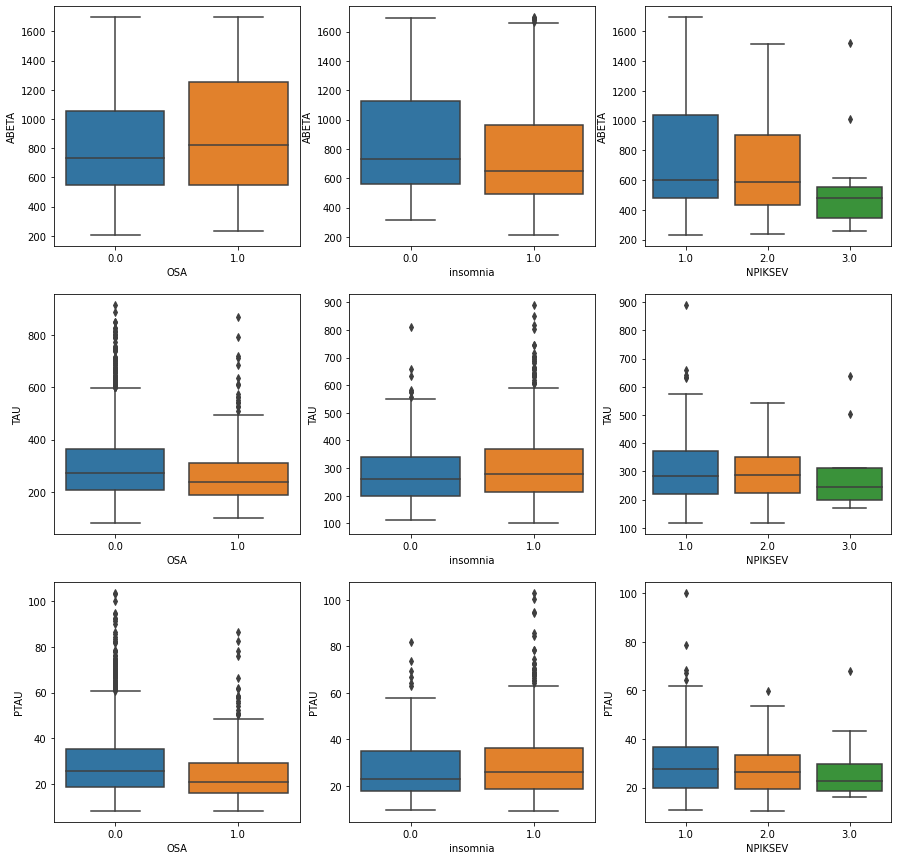

In [16]:
cols = ['OSA','insomnia','NPIKSEV']
f, axes = plt.subplots(3, 3)
f.set_size_inches(15, 15) 
sns.boxplot(y='ABETA', x= cols[0], data=abeta_num, orient='v', ax=axes[0][0])
sns.boxplot(y='ABETA', x= cols[1], data=abeta_num, orient='v', ax=axes[0][1])
sns.boxplot(y='ABETA', x= cols[2], data=abeta_num, orient='v', ax=axes[0][2])
sns.boxplot(y='TAU', x= cols[0], data=tau_num, orient='v', ax=axes[1][0])
sns.boxplot(y='TAU', x= cols[1], data=tau_num, orient='v', ax=axes[1][1])
sns.boxplot(y='TAU', x= cols[2], data=tau_num, orient='v', ax=axes[1][2])
sns.boxplot(y='PTAU', x= cols[0], data=ptau_num, orient='v', ax=axes[2][0])
sns.boxplot(y='PTAU', x= cols[1], data=ptau_num, orient='v', ax=axes[2][1])
sns.boxplot(y='PTAU', x= cols[2], data=ptau_num, orient='v', ax=axes[2][2])

From the plots it is hard to see that OSA, or insomnia, or NPIKSEV parameters have any correlation with the biomarkers.There are a small difference at NPIKSEV vs ABETA, where the NPIKSEV=3 the ABETA value is lower than the other two levels. 

### Try to fit with linear regression

In [17]:
def lin_model(df,target_col,var_cols,method,para_lst):
    '''
    split dataset to training and test groups (4:1),fit linear models by training data and return scores 
    df: dataframe
    target_col: the column which we want to predict
    var_cols: columns we want to use in the model
    method: Ridge, or Lasso, or LogisticRegression...
    para_lst: a list which contains different values of regularization parameter alpha or C
    '''
    train, test = train_test_split(df.dropna(axis=0,how='any'),test_size=0.2)    
    X_train = train[var_cols]
    y_train = train[target_col]
    X_test = test[var_cols]
    y_test = test[target_col]
    
    #print(train.describe())
    #print(test.describe())
    for i in range(len(para_lst)): 
        if method == LogisticRegression:
            model = LogisticRegression(C = para_lst[i]).fit(X_train,y_train) 
        else:            
            model = method(alpha = para_lst[i]).fit(X_train,y_train) # ridge model
        print('parameter: {}, Training set score: {}, Test set score: {}'.format(para_lst[i],model.score(X_train,y_train),model.score(X_test,y_test)))

In [18]:
a = [0.001,0.01,0.1,1,10,100]
lin_model(df=abeta_num,target_col='ABETA',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=abeta_num,target_col='ABETA',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.06818068197025506, Test set score: -0.09027361514932952
parameter: 0.01, Training set score: 0.06818066742796869, Test set score: -0.0902325123639176
parameter: 0.1, Training set score: 0.068179230094909, Test set score: -0.08982419260642271
parameter: 1, Training set score: 0.06805077740251664, Test set score: -0.0859935741838469
parameter: 10, Training set score: 0.062464532510657866, Test set score: -0.06252173485073653
parameter: 100, Training set score: 0.02870545490922971, Test set score: -0.027273205237505538
parameter: 0.001, Training set score: 0.027640187206355082, Test set score: 0.04346489093087824
parameter: 0.01, Training set score: 0.02764017303858035, Test set score: 0.04342265556988478
parameter: 0.1, Training set score: 0.027638756361816896, Test set score: 0.04299954180118204
parameter: 1, Training set score: 0.027497089692551158, Test set score: 0.038692388237558384
parameter: 10, Training set score: 0.01931178643443865, Test 

In [19]:
lin_model(df=tau_num,target_col='TAU',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=tau_num,target_col='TAU',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.016570159867917877, Test set score: 0.010449212483579107
parameter: 0.01, Training set score: 0.016570156317950446, Test set score: 0.010443380211535347
parameter: 0.1, Training set score: 0.01656980549328202, Test set score: 0.010384968067895128
parameter: 1, Training set score: 0.016538491490617147, Test set score: 0.009795583900754856
parameter: 10, Training set score: 0.015187417421850702, Test set score: 0.004686497107083354
parameter: 100, Training set score: 0.007182121236907202, Test set score: -0.007629600556130711
parameter: 0.001, Training set score: 0.0170563687840235, Test set score: 0.02177576247989832
parameter: 0.01, Training set score: 0.01705620967948629, Test set score: 0.02175018810122109
parameter: 0.1, Training set score: 0.01704029882654745, Test set score: 0.02146381208838355
parameter: 1, Training set score: 0.01602933291318398, Test set score: 0.016437922216065548
parameter: 10, Training set score: 0.0, Test set score: -

In [20]:
lin_model(df=ptau_num,target_col='PTAU',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=ptau_num,target_col='PTAU',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.038288674515715826, Test set score: -0.06552306114969952
parameter: 0.01, Training set score: 0.03828866678873122, Test set score: -0.06548291939085016
parameter: 0.1, Training set score: 0.0382879014012274, Test set score: -0.06508407360653212
parameter: 1, Training set score: 0.038218124857430924, Test set score: -0.06133713555952469
parameter: 10, Training set score: 0.034878268960503056, Test set score: -0.03851351128344027
parameter: 100, Training set score: 0.014756965500926311, Test set score: -0.00741386080867068
parameter: 0.001, Training set score: 0.017814183300548736, Test set score: -0.028204155804431252
parameter: 0.01, Training set score: 0.017803622980096745, Test set score: -0.027641294352574786
parameter: 0.1, Training set score: 0.016747590897263298, Test set score: -0.023471416622579788
parameter: 1, Training set score: 0.0, Test set score: -0.05023122718402395
parameter: 10, Training set score: 0.0, Test set score: -0.0502312

Sckit-learn's LinearRegression scores uses 𝑅2 score. A negative 𝑅2 means that the model fitted your data extremely bad.

With both Ridge and Lasso regularization, the linear models fitted the Abeta, Tau, PTau very bad. 

### Sleep vs Diagnosis(MCI, AD, NC)

Quick recap:
- ADNI1: DXCURREN 1=NL; 2=MCI; 3=AD
- ADNIGO/2: DXCHANGE    
    1=Stable: NL to NL;    
    2=Stable: MCI to MCI;  
    3=Stable: Dementia to Dementia;   
    4=Conversion: NL to MCI;   
    5=Conversion: MCI to Dementia; 
    6=Conversion: NL to Dementia;  
    7=Reversion: MCI to NL;   
    8=Reversion: Dementia to MCI;   
    9=Reversion: Dementia to NL    
- ADNI3: DIAGNOSIS 1=CN; 2=MCI; 3=Dementia

### Diagnosis-Change vs sleep criteria

In [21]:
df.groupby('insomnia').count()

,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,...,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,DX_bl
insomnia,,,,,,,,,,,,,,,,,,,,,
0.0,840,840,840,840,840,840,840,840,840,667,...,3,3,1,0,639,639,639,638,637,835
1.0,15142,15142,15142,15142,15142,14326,14326,14326,14315,13803,...,10475,10469,7187,9629,10109,10103,10086,10075,10069,14300


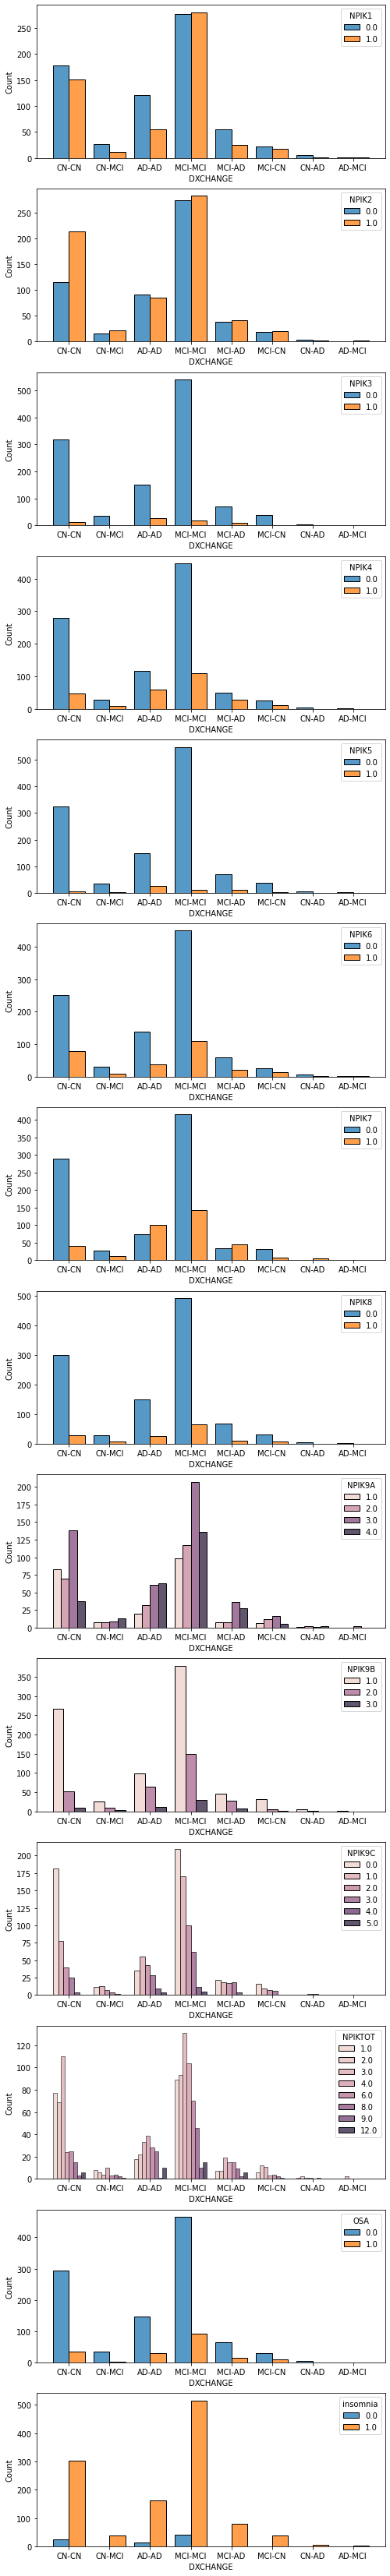

In [22]:
sleep_dxch = sleep.merge(df[com_col + ['DXCHANGE']],how='inner',on=com_col).dropna(subset=['DXCHANGE']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
#sleep_dxch_str = sleep_dxch.copy()
#sleep_dxch_str.iloc[:,3:17] = sleep_dxch_str.iloc[:,3:17].astype('Int64').astype('str')
#sleep_dxch_str.head(2)
lst = ['NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5','NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT',
        'OSA', 'insomnia']   # extract the column names of variables 
f, axes = plt.subplots(len(lst), 1,figsize=(8, 60))
for i in range(len(lst)):
    sns.histplot(data=sleep_dxch, x="DXCHANGE", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

In [23]:
sleep_dxch.groupby('DXCHANGE').count()

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia
DXCHANGE,,,,,,,,,,,,,,,,,
AD-AD,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
AD-MCI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CN-AD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
CN-CN,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329
CN-MCI,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
MCI-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
MCI-CN,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
MCI-MCI,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558


### The histograms above showed us the relationship between different diagnosis changes to categorical sleep parameters. There are some interesting points:
- insomnia vs DXCHANGE: In the 3 groups without changes, around half of records have insomnia, half not. In other five changes, all records have insomnia.
- 

### Current-Diagnosis vs sleep criteria

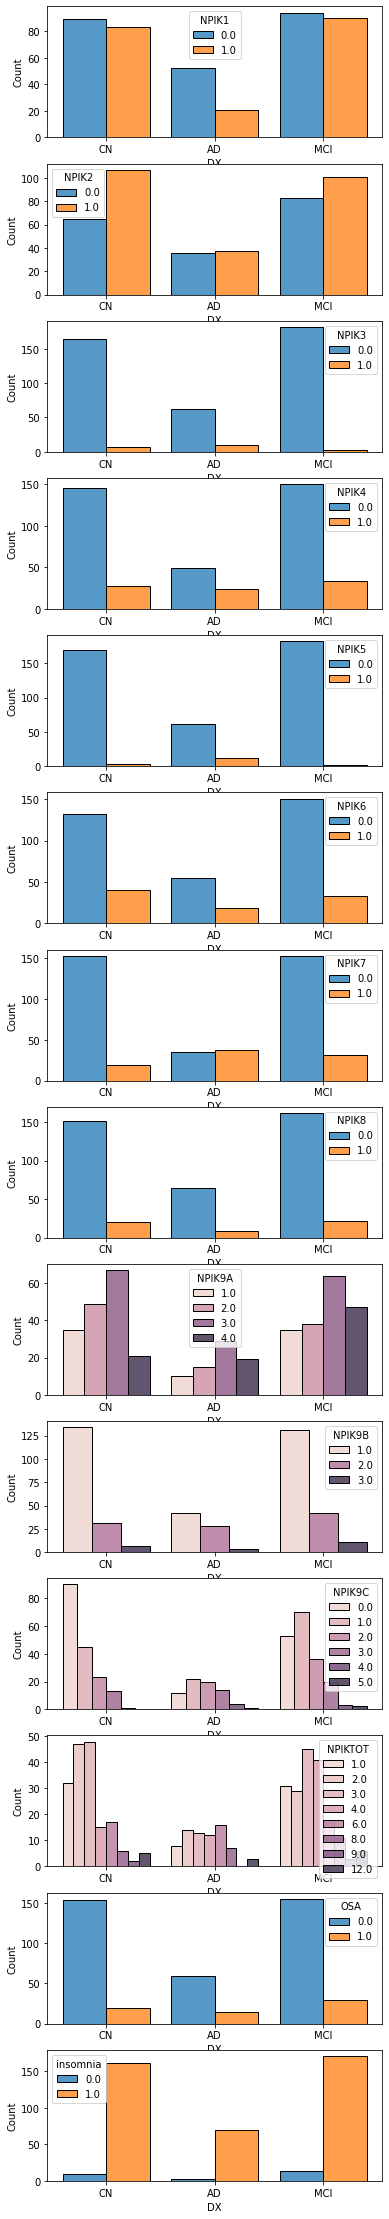

In [24]:
sleep_dx = sleep.merge(df[com_col + ['DX']],how='inner',on=com_col).dropna(subset=['DX']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
f, axes = plt.subplots(len(lst), 1,figsize=(6, 40))
for i in range(len(lst)):
    sns.histplot(data=sleep_dx, x="DX", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

### Diagnosis-baseline vs sleep criteria

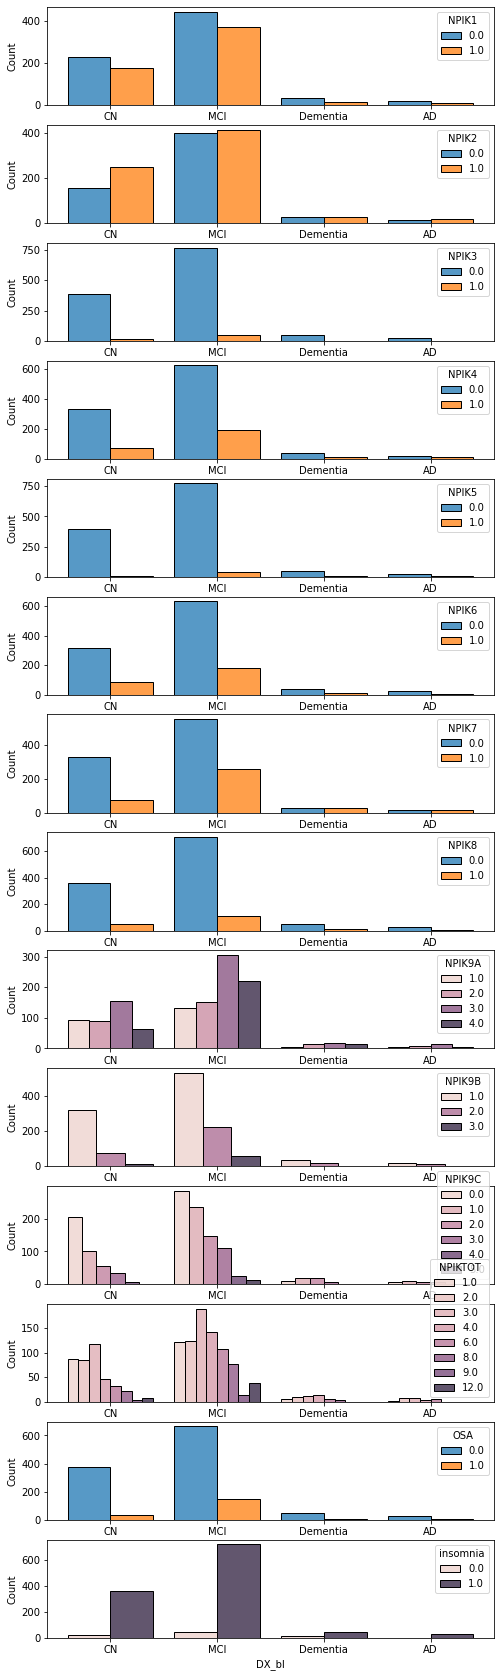

In [25]:
sleep_dxbl = sleep.merge(df[com_col + ['DX_bl']],how='inner',on=com_col).dropna(subset=['DX_bl']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
f, axes = plt.subplots(len(lst), 1,figsize=(8, 30))
for i in range(len(lst)):
    sns.histplot(data=sleep_dxbl, x="DX_bl", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

### total score of NPIK test to DXCHANGE, DX, and DX baseline

<AxesSubplot:xlabel='DX_bl', ylabel='NPIKTOT'>

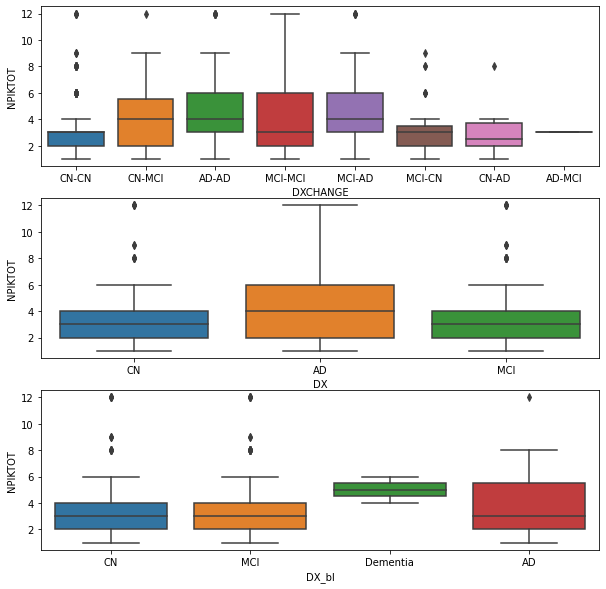

In [26]:
f, axes = plt.subplots(3, 1,figsize=(10, 10))
sns.boxplot(x=sleep_dxch["DXCHANGE"], y=sleep_dxch['NPIKTOT'], orient='v', ax=axes[0])
sns.boxplot(x=sleep_dx["DX"], y=sleep_dx['NPIKTOT'], orient='v', ax=axes[1])
sns.boxplot(x=sleep_dxbl["DX_bl"], y=sleep_dx['NPIKTOT'], orient='v', ax=axes[2])

### logistic regression, diagnosis changes as the target variable.
use dataframe sleep_dxch

In [27]:
train, test = train_test_split(sleep_dxch.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DXCHANGE']
X_test = test[lst]
y_test = test['DXCHANGE']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.449, Test set score: 0.476
lbfgs_L2,C:0.01, Training set score:0.486, Test set score: 0.508
lbfgs_L2,C:0.1, Training set score:0.495, Test set score: 0.504
lbfgs_L2,C:1, Training set score:0.492, Test set score: 0.512
lbfgs_L2,C:10, Training set score:0.491, Test set score: 0.512
lbfgs_L2,C:100, Training set score:0.491, Test set score: 0.508
saga_L1,C:0.001, Training set score:0.449, Test set score: 0.476
saga_L1,C:0.01, Training set score:0.449, Test set score: 0.476
saga_L1,C:0.1, Training set score:0.488, Test set score: 0.504
saga_L1,C:1, Training set score:0.495, Test set score: 0.508
saga_L1,C:10, Training set score:0.492, Test set score: 0.512
saga_L1,C:100, Training set score:0.491, Test set score: 0.508
newton-cg_L2,C:0.001, Training set score:0.449, Test set score: 0.476
newton-cg_L2,C:0.01, Training set score:0.486, Test set score: 0.508
newton-cg_L2,C:0.1, Training set score:0.495, Test set score: 0.504
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (982, 14)
Reduced shape: (982, 4)
explained variance: [2.84048725 1.60014608 1.21792712 1.119949  ]
explained variance ratio: [0.20268534 0.11417976 0.08690621 0.07991489]
Origianl shape: (982, 14)
Reduced shape: (982, 4)
PCA components: 
[[-0.07770044  0.04461271  0.17280437  0.2026768   0.13533882  0.05064921
   0.22250821  0.09332605  0.39064392  0.48691124  0.39125463  0.54149002
   0.07092757  0.03039627]
 [-0.1330534   0.33591882  0.44410652  0.34107335  0.42518944  0.4053627
  -0.19631221 -0.00307928 -0.28914901 -0.06194778  0.07463341 -0.19293658
   0.20120495 -0.03896135]
 [-0.50970473 -0.39798437  0.16999467  0.03776625  0.19177887 -0.15732816
   0.53372608  0.26315763  0.00165302 -0.26450045  0.00606952 -0.19370926
   0.08561327  0.14486318]
 [ 0.55090297 -0.47943567  0.23042314  0.05972478  0.29518244 -0.12803828
  -0.19487385  0.40625475 -0.16699027  0.09067387  0.07541053 -0.01720647
  -0.23830886  0.06751928]]


Text(0, 0.5, 'Principal components')

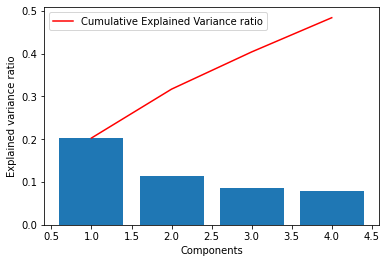

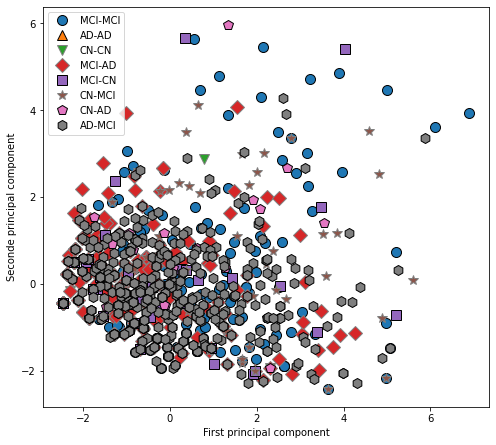

<Figure size 864x864 with 0 Axes>

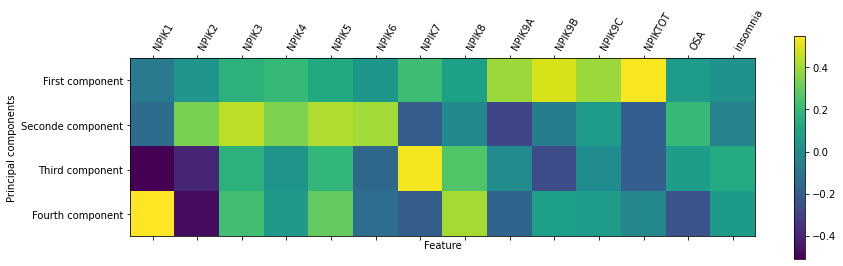

In [28]:
pca = PCA(n_components=4) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DXCHANGE'])
plt.legend(train['DXCHANGE'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [29]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.612, Test set f-score: 0.417
logistic with PCA data. C:0.001, Training set f1-score:0.620, Test set f1-score: 0.645
logistic with PCA data. C:0.01, Training set f1-score:0.588, Test set f1-score: 0.587
logistic with PCA data. C:0.1, Training set f1-score:0.564, Test set f1-score: 0.539
logistic with PCA data. C:1, Training set f1-score:0.565, Test set f1-score: 0.528
logistic with PCA data. C:10, Training set f1-score:0.566, Test set f1-score: 0.528
logistic with PCA data. C:100, Training set f1-score:0.566, Test set f1-score: 0.528
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.620 f1-score on test data: 0.6446280991735537
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.612 f1-score on test data: 0.6300698499942746
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.537 f1-score on test data: 0.516204351229163
Decision tree with unscaled d

## use dataframe sleep_dx, target_variable 'DX'

In [30]:
sleep_dx

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia,DX
13,ADNI3,72,init,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,CN
15,ADNI3,72,y4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,CN
17,ADNI3,112,init,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,2.0,3.0,8.0,0.0,1.0,AD
25,ADNI3,120,init,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,CN
31,ADNI3,127,init,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,4.0,1.0,1.0,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,ADNI3,7011,bl,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,CN
1325,ADNI3,7039,bl,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,AD
1326,ADNI3,7071,bl,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,MCI
1327,ADNI3,7082,bl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,CN


In [31]:
train, test = train_test_split(sleep_dx.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX']
X_test = test[lst]
y_test = test['DX']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.522, Test set score: 0.523
lbfgs_L2,C:0.01, Training set score:0.534, Test set score: 0.570
lbfgs_L2,C:0.1, Training set score:0.542, Test set score: 0.593
lbfgs_L2,C:1, Training set score:0.557, Test set score: 0.581
lbfgs_L2,C:10, Training set score:0.566, Test set score: 0.581
lbfgs_L2,C:100, Training set score:0.566, Test set score: 0.570
saga_L1,C:0.001, Training set score:0.414, Test set score: 0.349
saga_L1,C:0.01, Training set score:0.414, Test set score: 0.349
saga_L1,C:0.1, Training set score:0.542, Test set score: 0.512
saga_L1,C:1, Training set score:0.551, Test set score: 0.593
saga_L1,C:10, Training set score:0.563, Test set score: 0.581
saga_L1,C:100, Training set score:0.566, Test set score: 0.570
newton-cg_L2,C:0.001, Training set score:0.522, Test set score: 0.523
newton-cg_L2,C:0.01, Training set score:0.534, Test set score: 0.570
newton-cg_L2,C:0.1, Training set score:0.542, Test set score: 0.593
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (343, 14)
Reduced shape: (343, 10)
explained variance: [2.77723709 1.57865333 1.27484764 1.1835432  1.11784968 1.04666138
 0.96910058 0.85275954 0.83356347 0.70703317]
explained variance ratio: [0.19779573 0.1124322  0.09079506 0.08429233 0.07961362 0.07454356
 0.06901966 0.06073381 0.05936666 0.05035513]
Origianl shape: (343, 14)
Reduced shape: (343, 4)
PCA components: 
[[-0.0414471   0.06600264  0.11490132  0.20345231  0.04870204  0.15479351
   0.26425895 -0.01969675  0.39353139  0.4806752   0.39255551  0.54632115
   0.02212366  0.06168699]
 [-0.2734309   0.23931399  0.50827937  0.32007119  0.4696221   0.39558257
   0.04582607 -0.07709414 -0.23686224 -0.10604517  0.02202313 -0.20710566
   0.10183955 -0.03159893]
 [ 0.17722551 -0.6008291   0.17378824  0.25254185  0.18732217 -0.23256276
  -0.05071787  0.5314118  -0.22139305  0.08353724  0.26341465 -0.06350057
   0.0905997   0.04299623]
 [ 0.7029118   0.05627986  0.13811556 -0.05999434  0.18564843 -0.03415152
  -0.271991

Text(0, 0.5, 'Principal components')

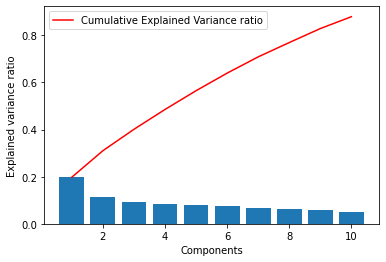

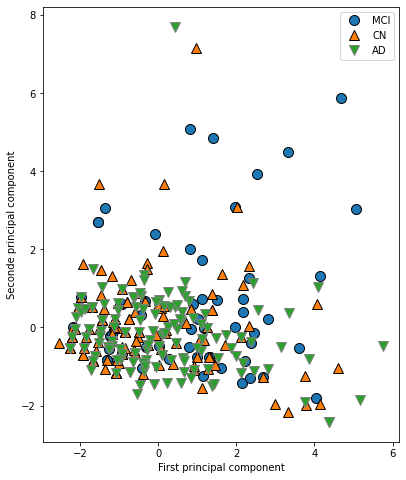

<Figure size 864x864 with 0 Axes>

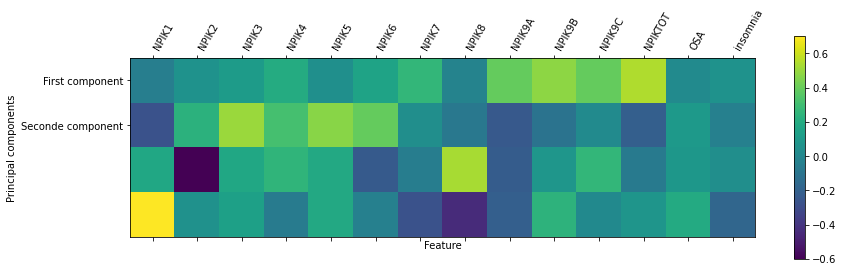

In [32]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX'])
plt.legend(train['DX'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First component','Seconde component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [33]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.616, Test set f-score: 0.502
logistic with PCA data. C:0.001, Training set f1-score:0.549, Test set f1-score: 0.490
logistic with PCA data. C:0.01, Training set f1-score:0.530, Test set f1-score: 0.506
logistic with PCA data. C:0.1, Training set f1-score:0.529, Test set f1-score: 0.514
logistic with PCA data. C:1, Training set f1-score:0.529, Test set f1-score: 0.514
logistic with PCA data. C:10, Training set f1-score:0.529, Test set f1-score: 0.514
logistic with PCA data. C:100, Training set f1-score:0.529, Test set f1-score: 0.514
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.562 f1-score on test data: 0.5739957716701903
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.583 f1-score on test data: 0.6107449322223605
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.560 f1-score on test data: 0.6153166693033804
Decision tree with unscaled 

In [34]:
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,12],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))

MLP with scaled data. f1-score on training data: 0.851 f1-score on test data: 0.511


## use dataframe sleep_dxbl, target_variable 'DX_bl'

In [35]:
sleep_dxbl

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia,DX_bl
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,0.0,1.0,CN
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,0.0,1.0,CN
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,CN
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,ADNI3,7011,bl,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,CN
1325,ADNI3,7039,bl,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,AD
1326,ADNI3,7071,bl,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,MCI
1327,ADNI3,7082,bl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,CN


In [36]:
train, test = train_test_split(sleep_dxbl.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX_bl']
X_test = test[lst]
y_test = test['DX_bl']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.616, Test set score: 0.632
lbfgs_L2,C:0.01, Training set score:0.645, Test set score: 0.603
lbfgs_L2,C:0.1, Training set score:0.644, Test set score: 0.579
lbfgs_L2,C:1, Training set score:0.638, Test set score: 0.571
lbfgs_L2,C:10, Training set score:0.637, Test set score: 0.571
lbfgs_L2,C:100, Training set score:0.637, Test set score: 0.571
saga_L1,C:0.001, Training set score:0.616, Test set score: 0.632
saga_L1,C:0.01, Training set score:0.616, Test set score: 0.632
saga_L1,C:0.1, Training set score:0.648, Test set score: 0.599
saga_L1,C:1, Training set score:0.641, Test set score: 0.571
saga_L1,C:10, Training set score:0.637, Test set score: 0.571
saga_L1,C:100, Training set score:0.637, Test set score: 0.571
newton-cg_L2,C:0.001, Training set score:0.616, Test set score: 0.632
newton-cg_L2,C:0.01, Training set score:0.645, Test set score: 0.603
newton-cg_L2,C:0.1, Training set score:0.644, Test set score: 0.579
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (988, 14)
Reduced shape: (988, 10)
explained variance: [2.8685446  1.61867539 1.25655662 1.10854884 1.03421147 0.99095776
 0.96945616 0.93631962 0.79979284 0.67481144]
explained variance ratio: [0.20468866 0.11550265 0.0896632  0.07910192 0.07379748 0.07071105
 0.06917678 0.06681228 0.05707024 0.04815203]
Origianl shape: (988, 14)
Reduced shape: (988, 4)
PCA components: 
[[-6.20557554e-02  1.56928821e-02  1.64132004e-01  2.25320773e-01
   1.26690228e-01  7.32043472e-02  2.32390490e-01  9.09276150e-02
   3.84624910e-01  4.85421253e-01  3.95699953e-01  5.37988010e-01
   5.41429892e-02  4.47265053e-02]
 [-1.24711976e-01  3.31824356e-01  4.79760274e-01  3.44037788e-01
   4.18324113e-01  3.81473914e-01 -1.88593565e-01 -5.25760934e-04
  -3.18500342e-01 -4.47514794e-02  8.93873557e-02 -1.93489901e-01
   1.42561625e-01 -2.29120125e-02]
 [-4.88335205e-01 -4.24526207e-01  7.50239948e-02  3.79940606e-02
   1.57312232e-01 -1.37572257e-01  3.93442035e-01  4.83569285e-01
  -5.6528991

Text(0, 0.5, 'Principal components')

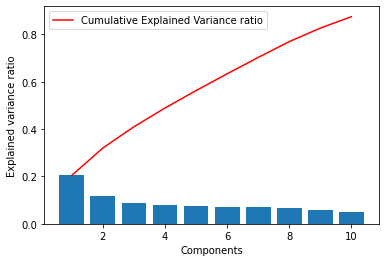

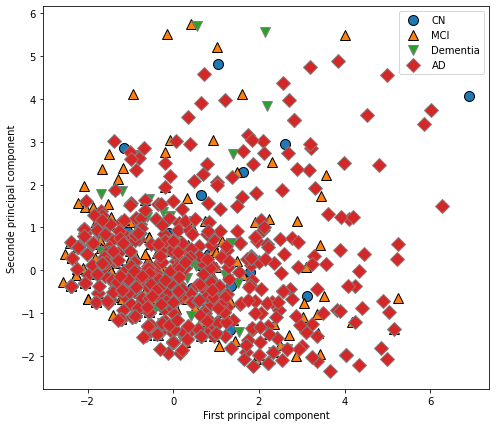

<Figure size 864x864 with 0 Axes>

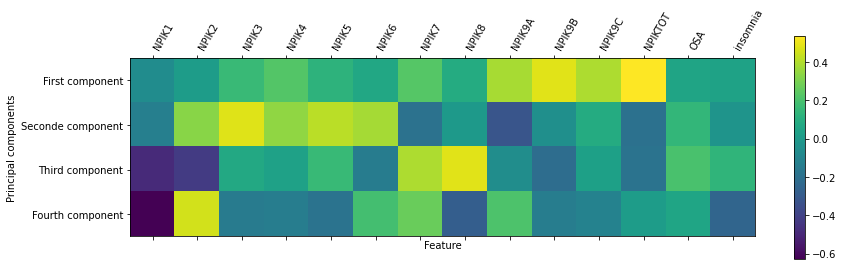

In [37]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX_bl'])
plt.legend(train['DX_bl'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [38]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.693, Test set f-score: 0.592
logistic with PCA data. C:0.001, Training set f1-score:0.763, Test set f1-score: 0.774
logistic with PCA data. C:0.01, Training set f1-score:0.738, Test set f1-score: 0.731
logistic with PCA data. C:0.1, Training set f1-score:0.724, Test set f1-score: 0.725
logistic with PCA data. C:1, Training set f1-score:0.722, Test set f1-score: 0.725
logistic with PCA data. C:10, Training set f1-score:0.722, Test set f1-score: 0.725
logistic with PCA data. C:100, Training set f1-score:0.722, Test set f1-score: 0.725
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.763 f1-score on test data: 0.7741935483870968
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.645 f1-score on test data: 0.6065860744759827
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.672 f1-score on test data: 0.6310793715032843
Decision tree with unscaled 

neubat

In [39]:
neubat = pd.read_csv('neurobat_short.csv',sep=';').iloc[:,1:]
neubat = neubat.dropna(subset=neubat.columns[3:],how='all')
sleep_neubat = sleep.merge(neubat,how='inner',on=com_col)
sleep_neubat

KeyError: 'Phase'